# AFX Processing

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy as sp
import glob

pylab.rcParams['figure.figsize'] = (22.0, 11.0)

## Load the ET data

### Header info
- date_time
- USTAR (m/s)
- WDIR (deg)
- WSPD (m/s)
- T_HMP (degC)
- TSONIC (degC)
- TACTUAL (degK)
- RAIN (mm)
- RH_HMP
- H2O_HMP
- PAR_IN (umol photons/m2/s)
- PAR_OUT (umol photons/m2/s)
- SOLAR_IN (W/m2)
- SOLAR_OUT (W/m2)
- RNET (W/m2)
- G (W/m2)
- SENSIBLE_HEAT (W/m2)
- LATENT_HEAT (W/m2)
- CO2_FLUX (umol CO2/m2 s)
- H2O_FLUX (mmol H2O/m2 s)
- NDVI', u' T_Soil_Surface (degC)
- Soil_Moisture_1 (%)
- Soil_Moisture_2 (%)
- Soil_Moisture_3 (%)
- Soil_Moisture_4 (%)
- StartT_5cm (degC)
- StartT_10cm (degC)
- StartT_25cm (degC)
- StartT_50cm (degC)
- StartT_100cm (degC)
- StartT_200cm (degC)
- DelT_5cm (degC)
- DelT_10cm (degC)
- DelT_25cm (degC)
- DelT_50cm (degC)
- DelT_100cm (degC)
- DelT_200cm (degC)
- USTAR_SOURCE_FLAG
- SENSIBLE_HEAT_SOURCE_FLAG
- LATENT_HEAT_SOURCE_FLAG
- CO2_FLUX_SOURCE_FLAG
- H2O_FLUX_SOURCE_FLAG'

In [8]:
pwd

u'/Volumes/Users/Theo/projects/greenness_timing'

In [9]:
files = glob.glob('../../greenness_timing/ameriflux/CA_p301/level2/*.csv')

In [10]:
cols = ['date_time',' USTAR','WDIR','WSPD','T_HMP','TSONIC','TACTUAL', 'RAIN','RH_HMP','H2O_HMP','PAR_IN','PAR_OUT',
        'SOLAR_IN','SOLAR_OUT','RNET','G','SENSIBLE_HEAT', 'LATENT_HEAT','CO2_FLUX','H2O_FLUX','NDVI','T_Soil_Surface',
        'Soil_Moisture_1','Soil_Moisture_2','Soil_Moisture_3','Soil_Moisture_4','StartT_5cm','StartT_10cm',
        'StartT_25cm','StartT_50cm','StartT_100cm','StartT_200cm','DelT_5cm','DelT_10cm','DelT_25cm','DelT_50cm',
        'DelT_100cm','DelT_200cm','USTAR_SOURCE_FLAG','SENSIBLE_HEAT_SOURCE_FLAG','LATENT_HEAT_SOURCE_FLAG',
        'CO2_FLUX_SOURCE_FLAG','H2O_FLUX_SOURCE_FLAG']

In [11]:
files

['../../greenness_timing/ameriflux/CA_p301/level2/P301_v3_4_wy2008.csv',
 '../../greenness_timing/ameriflux/CA_p301/level2/P301_v3_4_wy2009.csv',
 '../../greenness_timing/ameriflux/CA_p301/level2/P301_v3_4_wy2010.csv',
 '../../greenness_timing/ameriflux/CA_p301/level2/P301_v3_4_wy2011.csv',
 '../../greenness_timing/ameriflux/CA_p301/level2/P301_v3_4_wy2012.csv',
 '../../greenness_timing/ameriflux/CA_p301/level2/P301_v3_4_wy2013.csv',
 '../../greenness_timing/ameriflux/CA_p301/level2/P301_v3_4_wy2014.csv',
 '../../greenness_timing/ameriflux/CA_p301/level2/P301_v3_4_wy2015.csv']

In [18]:
p301 = pd.DataFrame() # preallocate

for fl in files:
    dat = pd.read_csv(fl, names=cols, low_memory=False, na_values=' NaN',skiprows=1)
    dat.index = pd.DatetimeIndex(dat.date_time)
    del dat['date_time']
    
    p301 = pd.concat([p301,dat])
p301 = p301.drop_duplicates()

In [19]:
p301 = p301.sort()

/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [22]:
p301.head()

,USTAR,WDIR,WSPD,T_HMP,TSONIC,TACTUAL,RAIN,RH_HMP,H2O_HMP,PAR_IN,...,DelT_10cm,DelT_25cm,DelT_50cm,DelT_100cm,DelT_200cm,USTAR_SOURCE_FLAG,SENSIBLE_HEAT_SOURCE_FLAG,LATENT_HEAT_SOURCE_FLAG,CO2_FLUX_SOURCE_FLAG,H2O_FLUX_SOURCE_FLAG
date_time,,,,,,,,,,,,,,,,,,,,,
2008-09-05 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-05 06:00:00,NaN,NaN,NaN,19.19,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-05 06:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-05 07:00:00,NaN,NaN,NaN,19.08,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-05 11:00:00,NaN,NaN,NaN,18.95,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
p301.tail()

,USTAR,WDIR,WSPD,T_HMP,TSONIC,TACTUAL,RAIN,RH_HMP,H2O_HMP,PAR_IN,...,DelT_10cm,DelT_25cm,DelT_50cm,DelT_100cm,DelT_200cm,USTAR_SOURCE_FLAG,SENSIBLE_HEAT_SOURCE_FLAG,LATENT_HEAT_SOURCE_FLAG,CO2_FLUX_SOURCE_FLAG,H2O_FLUX_SOURCE_FLAG
date_time,,,,,,,,,,,,,,,,,,,,,
2015-09-30 21:30:00,0.219107,138.803424,1.477310,16.169060,17.511478,289.940973,0.0,0.336758,7.826426,916.503126,...,3.086,NaN,3.299,3.269,3.047,1.0,2.0,NaN,NaN,NaN
2015-09-30 22:00:00,0.220134,144.382139,1.197932,15.667963,17.236199,289.551125,0.0,0.403558,9.094558,626.036439,...,3.069,NaN,3.299,3.277,3.047,1.0,2.0,NaN,NaN,NaN
2015-09-30 22:30:00,0.224938,130.005433,0.814813,16.553431,18.175339,290.478789,0.0,0.385381,9.190967,743.932217,...,3.069,NaN,3.299,3.277,3.039,1.0,2.0,NaN,NaN,NaN
2015-09-30 23:00:00,0.310340,85.022457,1.055795,17.438108,18.599735,290.969734,0.0,0.335149,8.447943,700.829189,...,3.076,NaN,3.307,3.277,3.055,1.0,2.0,NaN,NaN,NaN
2015-09-30 23:30:00,0.205219,130.802186,1.423391,15.167068,16.897945,289.115525,0.0,0.466027,10.180969,444.934621,...,3.084,NaN,3.315,3.277,3.063,1.0,2.0,NaN,NaN,NaN


In [26]:
p301.columns

Index([u' USTAR', u'WDIR', u'WSPD', u'T_HMP', u'TSONIC', u'TACTUAL', u'RAIN',
       u'RH_HMP', u'H2O_HMP', u'PAR_IN', u'PAR_OUT', u'SOLAR_IN', u'SOLAR_OUT',
       u'RNET', u'G', u'SENSIBLE_HEAT', u'LATENT_HEAT', u'CO2_FLUX',
       u'H2O_FLUX', u'NDVI', u'T_Soil_Surface', u'Soil_Moisture_1',
       u'Soil_Moisture_2', u'Soil_Moisture_3', u'Soil_Moisture_4',
       u'StartT_5cm', u'StartT_10cm', u'StartT_25cm', u'StartT_50cm',
       u'StartT_100cm', u'StartT_200cm', u'DelT_5cm', u'DelT_10cm',
       u'DelT_25cm', u'DelT_50cm', u'DelT_100cm', u'DelT_200cm',
       u'USTAR_SOURCE_FLAG', u'SENSIBLE_HEAT_SOURCE_FLAG',
       u'LATENT_HEAT_SOURCE_FLAG', u'CO2_FLUX_SOURCE_FLAG',
       u'H2O_FLUX_SOURCE_FLAG', u'ET'],
      dtype='object')

In [27]:
# calculate ET from LE
# uses T in degrees C
# uses LE in W/m2
def le2et(x):
    
    LE = x.LATENT_HEAT 
    T = x.T_HMP
    
    cond = 2500.8-(2.36*T)+(0.0016*(T**2.))+(0.00006*(T**3.)) #J/g

    ET = LE/cond # calculate ET in g/m2

    if T <= 0:
        ET = ET/916.7 # kg/m2
    else:
        ET = ET/1000.0 # kg/m2


    ET = ET/1000 # m/m2

    ET = ET*1000 # mm/m2    

    return ET

In [29]:
p301['ET'] = p301.apply(le2et,axis=1)

p301['tot_ET'] = p301.ET*(60*30) # compute total ET per half hour increment assuming reported values are
# half hour averages. 
p301['tot_NEE'] = p301.CO2_FLUX*(60*30)

p3012 = p301.resample('A').sum() # compute yearly sums

In [30]:
p3012.tot_ET

date_time
2008-12-31     62.373559
2009-12-31    479.010360
2010-12-31    402.030283
2011-12-31    538.135883
2012-12-31    406.634637
2013-12-31    371.001705
2014-12-31    398.080440
2015-12-31    304.358648
Freq: A-DEC, Name: tot_ET, dtype: float64

In [31]:
p3012.tot_NEE

date_time
2008-12-31   -8.397819e+06
2009-12-31   -5.767767e+07
2010-12-31   -6.203253e+07
2011-12-31   -7.374496e+07
2012-12-31   -5.338608e+07
2013-12-31   -4.820004e+07
2014-12-31   -4.787683e+07
2015-12-31   -4.306512e+07
Freq: A-DEC, Name: tot_NEE, dtype: float64

## Save AFX Data

In [32]:
p301.to_pickle('../../greenness_timing/ameriflux/CA_p301/P301.pcl')
p301.to_pickle('./data/P301.pcl')

## Save AFX yearly Data

In [15]:
p3012.to_pickle('../../greenness_timing/ameriflux/CA_p301/P301_yearly.pcl')

## Plot Soil Moisture

In [34]:
p3013 = p301.resample('D').sum()

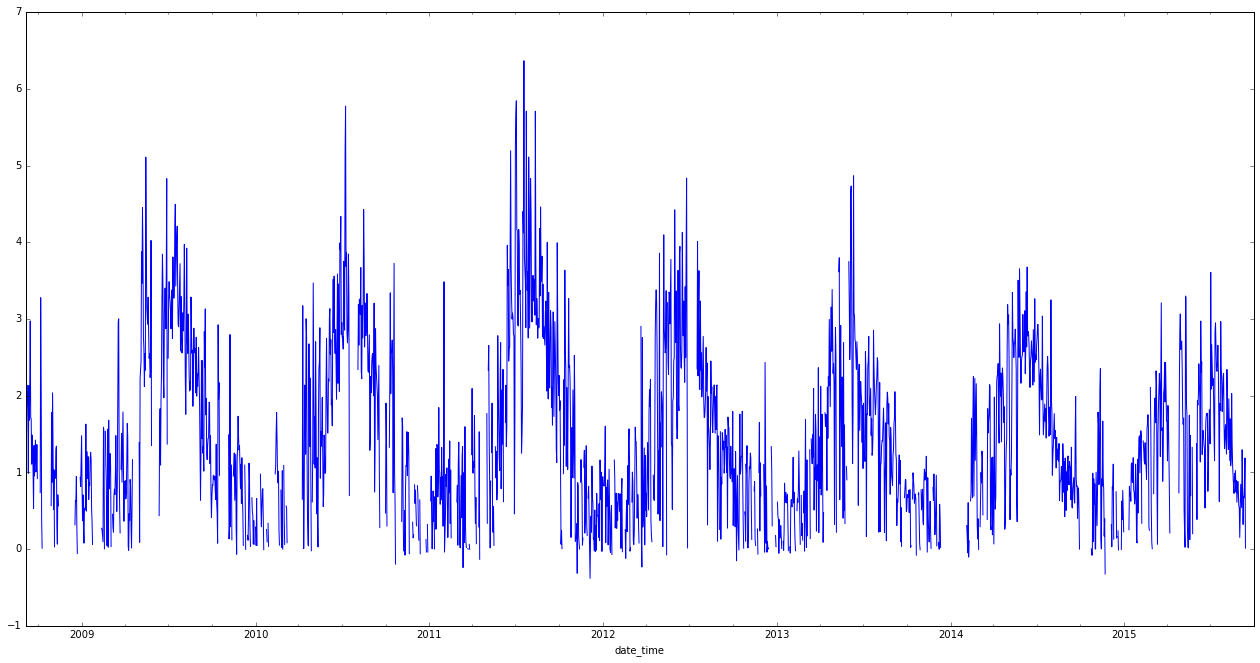

In [35]:
p3013.tot_ET.plot()

# Process ET and NEE like SWE

In [17]:
p301 = p301.filter(regex='tot') # pull out the variables of interest

In [18]:
p301.describe()

,tot_ET,tot_NEE
count,47187.000000,53483.000000
mean,0.037695,-4742.457689
std,0.067739,8970.866288
min,-0.399178,-61657.070400
25%,-0.000053,-9415.089900
50%,0.008924,-561.249000
75%,0.059021,311.994900
max,0.817084,50334.451200


In [19]:
years = np.unique(p301.index.year)
print 'Calendar Years: '+ str(years)
wyears = years[1:]
print 'Water Years: ' + str(wyears)

Calendar Years: [2008 2009 2010 2011 2012]
Water Years: [2009 2010 2011 2012]


In [20]:
cols = ['peakET','peakETdate','minET','minETdate','peakNEE','peakNEEdate', 'minNEE','minNEEdate'] # list the metrics to be extracted
FLX = pd.DataFrame(np.zeros([len(wyears),len(cols)]), index=wyears, columns=cols) # build a data frame

In [21]:
FLX

,peakET,peakETdate,minET,minETdate,peakNEE,peakNEEdate,minNEE,minNEEdate
2009,0,0,0,0,0,0,0,0
2010,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0
2012,0,0,0,0,0,0,0,0


In [22]:
for year in wyears:
    FLX.loc[year,'peakET'] = p301.loc[
str(year-1)+'-10-01':str(year)+'-09-30'].tot_ET.max() # extract the peak ET for the water year selected
    
    FLX.loc[year,'peakETdate'] = p301.loc[
str(year-1)+'-10-01':str(year)+'-09-30'].tot_ET.argmax() # extract the date of peak ET
    
    FLX.loc[year,'minET'] = p301.loc[
str(year-1)+'-10-01':str(year)+'-09-30'].tot_ET.min() # extract the peak ET for the water year selected
    
    FLX.loc[year,'minETdate'] = p301.loc[
str(year-1)+'-10-01':str(year)+'-09-30'].tot_ET.argmin() # extract the date of peak ET
    
    FLX.loc[year,'peakNEE'] = p301.loc[
str(year)+'-01-01':str(year)+'-09-30'].tot_NEE.min() # extract the peak NEE for the water year selected
    
    FLX.loc[year,'peakNEEdate'] = p301.loc[
str(year)+'-01-01':str(year)+'-09-30'].tot_NEE.argmin()
    
    FLX.loc[year,'minNEE'] = p301.loc[
str(year)+'-01-01':str(year)+'-09-30'].tot_NEE.max() # extract the peak NEE for the water year selected
    
    FLX.loc[year,'minNEEdate'] = p301.loc[
str(year)+'-01-01':str(year)+'-09-30'].tot_NEE.argmax()
    

In [23]:
FLX

,peakET,peakETdate,minET,minETdate,peakNEE,peakNEEdate,minNEE,minNEEdate
2009,0.8170837,2009-06-23 17:30:00,-0.399178,2009-07-30 00:00:00,-60156.71,2009-08-14 02:30:00,26443.28,2009-08-23 07:00:00
2010,0.7498029,2010-06-29 18:00:00,-0.3122256,2010-05-21 09:30:00,-59921.82,2010-05-02 17:00:00,38550.97,2010-01-06 04:30:00
2011,0.6260815,2011-07-01 18:00:00,-0.3652565,2011-07-25 10:30:00,-55619.67,2011-09-11 21:00:00,50334.45,2011-04-07 13:00:00
2012,0.7175643,2012-06-25 01:30:00,-0.3542102,2012-06-27 12:30:00,-56039.65,2012-04-24 21:30:00,48757.7,2012-08-18 08:00:00


In [24]:
FLX.to_pickle('./data/p301_flux_metrics.pcl')

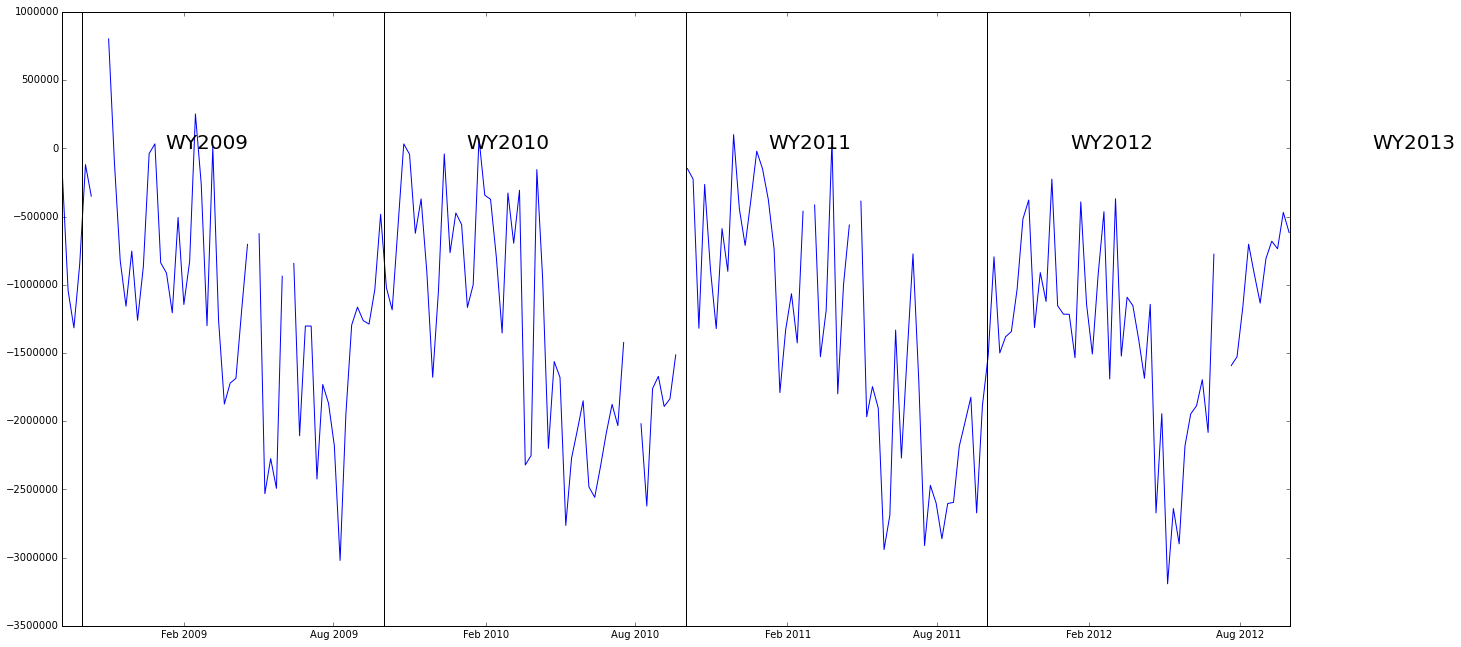

In [25]:
plt.plot(p301.resample('W', how = sum).index,p301.resample('W', how = sum).tot_NEE)
for y in years:
    plt.axvline(str(y)+'-10-01',color='k')
    plt.text(str(y+1)+'-01-10',28,'WY'+str(y+1), fontsize=20)

In [26]:
afx3 = p301.resample('D',how=np.nansum) # resample to daily sums 
afx3 = afx3.interpolate()

In [27]:
n = len(afx3)
afx3['cumulative_ET'] = np.zeros([n,1])
afx3['cumulative_NEE'] = np.zeros([n,1])
afx3['WY'] = np.zeros([n,1])
afx3['DOWY'] = np.zeros([n,1])

wystart = '-10-01' 
wyend = '-09-30'

for year in wyears:
    
    afx3.loc[str(year-1)+wyend,'cumulative_ET'] = afx3.loc[str(year-1)+wyend].tot_ET
    afx3.loc[str(year-1)+wyend,'cumulative_NEE'] = afx3.loc[str(year-1)+wyend].tot_NEE
    
    afx3.loc[str(year-1)+wyend,'WY'] = year
    afx3.loc[str(year-1)+wyend,'DOWY'] = 1
    
    DOWY = 1
    
    bar = afx3.loc[str(year-1)+wyend].cumulative_ET # pull out the value for the subsequent interations
    bar2 = afx3.loc[str(year-1)+wyend].cumulative_NEE

    
    for day in pd.date_range(str(year-1)+wystart,str(year)+wyend,freq='D'):
        day = str(day)
        afx3.loc[day,'cumulative_ET'] = afx3.loc[day].tot_ET + bar
        afx3.loc[day,'cumulative_NEE'] = afx3.loc[day].tot_NEE + bar2     
        
        bar = afx3.loc[day].cumulative_ET
        bar2 = afx3.loc[day].cumulative_NEE
        
        afx3.loc[day,'WY'] = year 
        
        DOWY += 1 # add one to the day of water year
        
        afx3.loc[day,'DOWY'] = DOWY

In [28]:
afx3

,tot_ET,tot_NEE,cumulative_ET,cumulative_NEE,WY,DOWY
2008-09-05,0.000000,0.0000,0.000000,0.0000,0,0
2008-09-06,1.174069,-74341.4850,0.000000,0.0000,0,0
2008-09-07,1.791909,-114953.9706,0.000000,0.0000,0,0
2008-09-08,1.610729,-94444.1892,0.000000,0.0000,0,0
2008-09-09,1.555876,-176386.9410,0.000000,0.0000,0,0
2008-09-10,0.827949,-266211.8352,0.000000,0.0000,0,0
2008-09-11,1.784998,-179146.2222,0.000000,0.0000,0,0
2008-09-12,1.407762,-144648.6660,0.000000,0.0000,0,0
2008-09-13,1.734456,-138045.7566,0.000000,0.0000,0,0
2008-09-14,2.490919,-44844.2262,0.000000,0.0000,0,0


In [42]:
cb = pylab.get_cmap('brg')
colors = cb(linspace(0.,1.,len(wyears)))
grey = '0.75'
fig = plt.figure()
ax = plt.gca()
ax2 = ax.twinx()
for i in xrange(0,len(wyears)):
    lns1 = ax.plot(afx3[afx3.WY == wyears[i]].DOWY,afx3[afx3.WY == wyears[i]].cumulative_ET,
             '-' ,c=grey, lw = 4, label = 'ET')
    
    lns2 = ax2.plot(afx3[afx3.WY == wyears[i]].DOWY,afx3[afx3.WY == wyears[i]].cumulative_NEE,
             '--' ,c=grey, lw = 4, label = 'NEE')
    


wyears2 = [2010,2011,2012]
colors = cb(linspace(0.,1.,len(wyears2)))

    
e1=ax.plot(afx3[afx3.WY == 2010].DOWY,afx3[afx3.WY == 2010].cumulative_ET,
        '-' ,c=colors[0], lw = 4, label = '2010' )
ax2.plot(afx3[afx3.WY == 2010].DOWY,afx3[afx3.WY == 2010].cumulative_NEE,
         '--' ,c=colors[0], lw = 4, label = '2010')

e2=ax.plot(afx3[afx3.WY == 2011].DOWY,afx3[afx3.WY == 2011].cumulative_ET,
        '-' ,c=colors[1], lw = 4, label = '2011' )
ax2.plot(afx3[afx3.WY == 2011].DOWY,afx3[afx3.WY == 2011].cumulative_NEE,
         '--' ,c=colors[1], lw = 4, label = '2011')

e3=ax.plot(afx3[afx3.WY == 2012].DOWY,afx3[afx3.WY == 2012].cumulative_ET,
        '-' ,c=colors[2], lw = 4, label = '2012' )
ax2.plot(afx3[afx3.WY == 2012].DOWY,afx3[afx3.WY == 2012].cumulative_NEE,
         '--' ,c=colors[2], lw = 4, label = '2012')
    
ax.set_ylabel('Cumulative ET [mm/m$^2$]', fontsize = 34)
ax2.set_ylabel('Cumulative NEE [$\mu$mol C/m$^2$]', fontsize = 34,)
plt.xlim([0,366])
lns = lns1+lns2
labs = [l.get_label() for l in lns];
ax2.legend(lns, labs, loc='upper left', fontsize=30);

lns22 = e1+e2+e3
labs22 = [l.get_label() for l in lns22];

ax.legend(lns22,labs22, loc='upper right', fontsize=30);

plt.setp(ax2.get_xmajorticklabels(), fontsize=30)
plt.setp(ax.get_xmajorticklabels(), fontsize=30)
plt.setp(ax.get_ymajorticklabels(), fontsize=30)
plt.setp(ax2.get_ymajorticklabels(), fontsize=30)
ax.set_xlabel('Day of Water Year', fontsize = 34)
ax.set_ylim([0,700])
ax2.set_ylim([-70000000,20000000])

plt.title('Providence Creek, CA', fontsize = 40);
plt.savefig('./figures/agu14_figs/p301_cumulative_NEE_ET.pdf',bbox_inches='tight',transparent=True)